<a href="https://colab.research.google.com/github/chltjs1921/2024_modeling_practice/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor>dataset>dataloader

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import numpy as np

In [2]:
!pip install rdkit
!pip install torch_geometric

# Optional dependencies:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.1/947.1 kB 35.6 MB/s eta 0:00:00


In [ ]:
rxn_ex_df_catalyst_fps = np.load('/content/drive/MyDrive/2024_modeling/rxn_ex_df_catalyst_fps.npy', allow_pickle=True)

In [ ]:
type(rxn_ex_df_catalyst_fps)

numpy.ndarray

In [ ]:
#convert ndarray to tensor
rxn_ex_df_catalyst_fps_tensor = torch.from_numpy(rxn_ex_df_catalyst_fps)

In [ ]:
type(rxn_ex_df_catalyst_fps_tensor)

torch.Tensor

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [4]:
rxn_ex_df = pd.read_csv('/content/drive/MyDrive/2024_modeling/ETHmodlab-lsfml-d0178f1/lsfml/data/experimental_rxndata.csv')
rxn_ex_df

,rxn_id,educt,rxn_scale_mol,rxn_temp_C,rxn_time_h,rxn_atm,rxn_c_moll,catalyst,catalyst_eq,ligand,ligand_eq,reagent,reagent_eq,solvent,solvent_ratio,yes_no,mono_bo,di_bo,non_bo,drug
0,ELN036496-175_1_1_D6,C1(=C(C)ON=C1C(C=C(F)C2)=CC=2)C3C=C[NH]N=3,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=C(C(=C2C=CC3=C(N=CC(=C3C)C)C12)C)C,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,N#CC,1,0,0.00,0.0,1.00,0
1,ELN036496-175_1_1_D5,C1(=C(C)ON=C1C(C=C(F)C2)=CC=2)C3C=C[NH]N=3,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC=C2C=CC=3C=CC=NC3C12,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,N#CC,1,0,0.00,0.0,1.00,0
2,ELN036496-175_1_1_D4,C1(=C(C)ON=C1C(C=C(F)C2)=CC=2)C3C=C[NH]N=3,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC(=CC1C=2N=CC=C(C2)C)C,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,N#CC,1,0,0.00,0.0,1.00,0
3,ELN036496-175_1_1_D3,C1(=C(C)ON=C1C(C=C(F)C2)=CC=2)C3C=C[NH]N=3,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC(=CC1C=2N=CC=C(C2)C(C)(C)C)C(C)(C)C,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,N#CC,1,0,0.00,0.0,1.00,0
4,ELN036496-175_1_1_D2,C1(=C(C)ON=C1C(C=C(F)C2)=CC=2)C3C=C[NH]N=3,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N1=CC=CC2=CC=CC(N)=C12,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,N#CC,1,0,0.00,0.0,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,ELN036496-112_1_1_A5,O(C1=CC=CC(OC)=C1OC)C,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC=C2C=CC=3C=CC=NC3C12,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,C1CCCCC1,1,1,0.78,0.0,0.23,0
952,ELN036496-112_1_1_A4,O(C1=CC=CC(OC)=C1OC)C,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC(=CC1C=2N=CC=C(C2)C)C,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,C1CCCCC1,1,1,0.82,0.0,0.18,0
953,ELN036496-112_1_1_A3,O(C1=CC=CC(OC)=C1OC)C,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N=1C=CC(=CC1C=2N=CC=C(C2)C(C)(C)C)C(C)(C)C,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,C1CCCCC1,1,1,0.78,0.0,0.21,0
954,ELN036496-112_1_1_A2,O(C1=CC=CC(OC)=C1OC)C,0.0001,80,18,N2,0.2,C[O+]1[Ir-]2[O+](C)[Ir-]12.C3CC=CCCC=C3.C4CC=C...,0.025,N1=CC=CC2=CC=CC(N)=C12,0.05,O1B(OC(C)(C)C1(C)C)B2OC(C)(C)C(O2)(C)C,1,C1CCCCC1,1,1,0.43,0.0,0.57,0


In [5]:
rxn_ex_df.describe()

,rxn_scale_mol,rxn_temp_C,rxn_time_h,rxn_c_moll,catalyst_eq,ligand_eq,reagent_eq,solvent_ratio,yes_no,mono_bo,di_bo,non_bo,drug
count,9.560000e+02,956.0,956.0,956.0,956.000,956.00,956.0,956.0,956.000000,956.000000,956.000000,956.000000,956.000000
mean,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,0.265690,0.115805,0.005220,0.879017,0.574268
std,1.355962e-20,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.441931,0.251452,0.031418,0.260348,0.494712
min,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,0.000000,0.000000,0.000000,0.977500,0.000000
50%,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,1.000000,0.020000,0.000000,1.000000,1.000000
max,1.000000e-04,80.0,18.0,0.2,0.025,0.05,1.0,1.0,1.000000,1.000000,0.430000,1.000000,1.000000


In [10]:
rxn_ex_df.drug.value_counts() #yes_no, drug는 0과 1. bo머시기들은 전부 회귀

,count
drug,
1,549
0,407


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

class molecular_data_process_loader(Dataset):
    def __init__(self, df):
        self.df = df

        self.mfpgen = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=256)

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        v_educt = self.df.iloc[idx]['educt']
        v_educt = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_educt)))
        v_educt = torch.from_numpy(v_educt).type(torch.LongTensor)

        v_catalyst = self.df.iloc[idx]['catalyst']
        v_catalyst = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_catalyst)))
        v_catalyst = torch.from_numpy(v_catalyst).type(torch.LongTensor)

        v_ligand = self.df.iloc[idx]['ligand']
        v_ligand = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_ligand)))
        v_ligand = torch.from_numpy(v_ligand).type(torch.LongTensor)

        v_reagent = self.df.iloc[idx]['reagent']
        v_reagent = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_reagent)))
        v_reagent = torch.from_numpy(v_reagent).type(torch.LongTensor)

        v_solvent = self.df.iloc[idx]['solvent']
        v_solvent = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_solvent)))
        v_solvent = torch.from_numpy(v_solvent).type(torch.LongTensor)

        v_conc = torch.cat((v_educt, v_catalyst, v_ligand, v_reagent, v_solvent), 0) #가로로 길게
        return v_educt, v_catalyst, v_ligand, v_reagent, v_solvent, v_conc

In [ ]:
loader = molecular_data_process_loader(rxn_ex_df)

In [ ]:
for v_educt, v_catalyst, v_ligand, v_reagent, v_solvent, v_conc in loader:
  print(v_educt.shape)
  print(v_catalyst.shape)
  print(v_ligand.shape)
  print(v_reagent.shape)
  print(v_solvent.shape)
  print(v_conc.shape)
  print(type(v_conc))
  break

torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([1280])
<class 'torch.Tensor'>


In [ ]:
v_conc

tensor([0, 0, 0,  ..., 0, 0, 0])

In [ ]:
rxn_ex_df_educp_fps = np.load('/content/drive/MyDrive/2024_modeling/rxn_ex_df_educp_fps.npy', allow_pickle=True)

In [ ]:
rxn_ex_df_educp_fps[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
class rxn_data_process_loader(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        rxn = self.df.iloc[idx][['rxn_scale_mol', 'rxn_temp_C', 'rxn_time_h','rxn_c_moll', 'catalyst_eq', 'ligand_eq', 'reagent_eq', 'solvent_ratio']]
        rxn = pd.to_numeric(rxn, errors='coerce')
        rxn = torch.torch.from_numpy(rxn.values).type(torch.FloatTensor)
        return rxn

In [ ]:
rxn_loader = rxn_data_process_loader(rxn_ex_df)

In [ ]:
for rxn in rxn_loader:
  print(rxn)
  print(type(rxn))
  break

tensor([1.0000e-04, 8.0000e+01, 1.8000e+01, 2.0000e-01])
<class 'torch.Tensor'>


In [59]:
from collections import Counter

list_dict_ligand = {}
list_counter = Counter(list(rxn_ex_df['ligand']))

for idx, x in enumerate(list_counter):
    list_dict_ligand[x] = idx

print(list_dict_ligand)

#dictinaray의 value만 따로 추출
print(list(list_dict_ligand.values()))

{'N=1C=C(C(=C2C=CC3=C(N=CC(=C3C)C)C12)C)C': 0, 'N=1C=CC=C2C=CC=3C=CC=NC3C12': 1, 'N=1C=CC(=CC1C=2N=CC=C(C2)C)C': 2, 'N=1C=CC(=CC1C=2N=CC=C(C2)C(C)(C)C)C(C)(C)C': 3, 'N1=CC=CC2=CC=CC(N)=C12': 4, 'N=1C=CC=CC1C=NN(CC=2C=CC=CC2)CC=3C=CC=CC3': 5}
[0, 1, 2, 3, 4, 5]


In [60]:
list_dict_sol = {}
list_counter_sol = Counter(list(rxn_ex_df['solvent']))

for idx, x in enumerate(list_counter_sol):
    list_dict_sol[x] = idx

print(list_dict_sol)

#dictinaray의 value만 따로 추출
print(list(list_dict_sol.values()))

{'N#CC': 0, 'O(C)C1CCCC1': 1, 'O1CCCC1C': 2, 'C1CCCCC1': 3}
[0, 1, 2, 3]


데이터로더에 드갈거(getitem)  
물질들 descriptor  
반응 조건들  
정답들

In [85]:
class data_process_loader(Dataset):
    def __init__(self, df):
        self.df = df

        self.mfpgen = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=256) #이 파라미터들도 변수에 포함?
        #mfpgen 여러개: 파라미터 독립적

        self.list_dict_ligand = {}
        list_counter_ligand = Counter(list(df['ligand']))
        for idx, x in enumerate(list_counter_ligand):
            self.list_dict_ligand[x] = idx

        self.list_dict_sol = {}
        list_counter_sol = Counter(list(df['solvent']))
        for idx, x in enumerate(list_counter_sol):
            self.list_dict_sol[x] = idx

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        v_educt = self.df.iloc[idx]['educt']
        v_educt = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_educt)))
        v_educt = torch.from_numpy(v_educt).type(torch.Tensor)

        v_catalyst = self.df.iloc[idx]['catalyst']
        v_catalyst = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_catalyst)))
        v_catalyst = torch.from_numpy(v_catalyst).type(torch.LongTensor)

        v_ligand = self.df.iloc[idx]['ligand']
        v_ligand_dict = torch.tensor(self.list_dict_ligand[v_ligand]).type(torch.LongTensor)
        # v_ligand = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_ligand)))
        # v_ligand = torch.from_numpy(v_ligand).type(torch.LongTensor)


        v_reagent = self.df.iloc[idx]['reagent']
        v_reagent = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_reagent)))
        v_reagent = torch.from_numpy(v_reagent).type(torch.LongTensor)

        v_solvent = self.df.iloc[idx]['solvent']
        v_solvent_dict = torch.tensor(self.list_dict_sol[v_solvent]).type(torch.LongTensor)
        # v_solvent = self.mfpgen.GetFingerprintAsNumPy(Chem.rdmolops.AddHs(Chem.MolFromSmiles(v_solvent)))
        # v_solvent = torch.from_numpy(v_solvent).type(torch.LongTensor)

        #v_conc = torch.cat((v_educt, v_catalyst, v_ligand, v_reagent, v_solvent), 0) #가로로 길게

        rxn = self.df.iloc[idx][['rxn_scale_mol', 'rxn_temp_C', 'rxn_time_h','rxn_c_moll', 'catalyst_eq', 'ligand_eq', 'reagent_eq', 'solvent_ratio']]
        rxn = pd.to_numeric(rxn, errors='coerce')
        rxn = torch.from_numpy(rxn.values).type(torch.FloatTensor)

        prod = self.df.iloc[idx][['yes_no',	'mono_bo',	'di_bo',	'non_bo',	'drug']]
        prod = pd.to_numeric(prod, errors='coerce')
        prod = torch.from_numpy(prod.values).type(torch.FloatTensor)
        #이 다섯개도 따로? >> prod를 풀기(unpack directly)
        return v_educt, v_ligand_dict, v_solvent_dict, prod

In [86]:
loader = data_process_loader(rxn_ex_df)

In [87]:
for v_educt, v_ligand_dict, v_solvent_dict, prod in loader:
    print(v_educt)
    print(v_educt.shape)
    print(v_ligand_dict)
    print(type(v_ligand_dict))
    print(v_solvent_dict)
    print(prod)
    break

tensor([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 

In [57]:
for v_educt, v_ligand, v_solvent, prod in loader:
    yes, mono, di, non, drug = prod # Unpack prod directly here
    print(yes, mono, di, non, drug)
    break

tensor(0.) tensor(0.) tensor(0.) tensor(1.) tensor(0.)


In [ ]:
v_educt

tensor([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

data 끝. 이제 모델링

In [147]:
import torch.nn as nn

class basemodel(nn.Module):
    def __init__(self, fp_dim=256, mlp_dim=512, kernel_dim=64, embeddings_dim=64, dropout=0.1):
        super(basemodel, self).__init__()

        self.embeddings_dim = embeddings_dim
        self.kernel_dim = kernel_dim
        self.mlp_dim = mlp_dim
        self.fp_dim = fp_dim

        self.dropout = nn.Dropout(dropout)

        self.mlp_descriptor = nn.Sequential(
            nn.Linear(self.fp_dim, self.kernel_dim * 2),
            self.dropout,
            nn.SiLU(),
            nn.Linear(self.kernel_dim * 2, self.kernel_dim * 2),
            nn.SiLU(),
            nn.Linear(self.kernel_dim * 2, self.kernel_dim),
        )

        self.mlp_condition_lig = nn.Embedding(num_embeddings=6, embedding_dim=self.embeddings_dim)
        self.mlp_condition_sol = nn.Embedding(num_embeddings=4, embedding_dim=self.embeddings_dim)

        nn.init.xavier_uniform_(self.mlp_condition_lig.weight)
        nn.init.xavier_uniform_(self.mlp_condition_sol.weight)

        self.post_pooling_mlp_input_dim = self.kernel_dim + self.embeddings_dim * 2

        self.mlp_output = nn.Sequential(
            nn.Linear(self.post_pooling_mlp_input_dim, self.mlp_dim),
            self.dropout,
            nn.SiLU(),
            nn.Linear(self.mlp_dim, self.mlp_dim),
            nn.SiLU(),
            nn.Linear(self.mlp_dim, self.mlp_dim),
            nn.SiLU(),
            nn.Linear(self.mlp_dim, 1),
        )

    def forward(self, v_educt, v_lig, v_sol):
        x_conc = self.mlp_descriptor(v_educt) #educt만으로
        # print("Shape of self.mlp_condition_lig(v_lig):", self.mlp_condition_lig(v_lig).shape)
        # print("Shape of self.mlp_condition_sol(v_sol):", self.mlp_condition_sol(v_sol).shape)
        x_rxn = torch.cat((self.mlp_condition_lig(v_lig), self.mlp_condition_sol(v_sol)), 0) #lig, sol 임베딩 후 cat. 임베딩 전처리는?
        # print("Shape of x_conc:", x_conc.shape)
        # print("Shape of x_rxn:", x_rxn.shape)

        x = torch.cat((x_conc, x_rxn), 0)
        # print("Shape of x:", x.shape)
        output = self.mlp_output(x)
        return output

In [16]:
!pip install torchinfo

In [17]:
from torchinfo import summary

In [89]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [90]:
def create_fold(df, fold_seed, frac):

    train_frac, val_frac, test_frac = frac

    test = df.sample(frac=test_frac, random_state=fold_seed, replace=False)
    train_val = df.drop(test.index)

    val = train_val.sample(frac=val_frac/(train_frac+val_frac), random_state=fold_seed, replace=False)
    train = train_val.drop(val.index)

    return train, val, test

In [91]:
train, val, test = create_fold(rxn_ex_df, 42, [0.7, 0.1, 0.2])

In [92]:
train_dataset = data_process_loader(train)
val_dataset = data_process_loader(val)
test_dataset = data_process_loader(test)

In [136]:
summary(basemodel(), col_names=["num_params", "trainable"],
        col_width=20, row_settings=["var_names"])

Layer (type (var_name))                  Param #              Trainable
basemodel (basemodel)                    --                   True
├─Dropout (dropout)                      --                   --
├─Sequential (mlp_descriptor)            --                   True
│    └─Linear (0)                        32,896               True
│    └─Dropout (1)                       --                   --
│    └─SiLU (2)                          --                   --
│    └─Linear (3)                        16,512               True
│    └─SiLU (4)                          --                   --
│    └─Linear (5)                        8,256                True
├─Embedding (mlp_condition_lig)          384                  True
├─Embedding (mlp_condition_sol)          256                  True
├─Sequential (mlp_output)                --                   True
│    └─Linear (0)                        98,816               True
│    └─Dropout (1)                       --                   --


In [106]:
model = basemodel()
model.to(device)

basemodel(
  (dropout): Dropout(p=0.1, inplace=False)
  (mlp_descriptor): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): SiLU()
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): SiLU()
    (5): Linear(in_features=128, out_features=64, bias=True)
  )
  (mlp_condition_lig): Embedding(6, 64)
  (mlp_condition_sol): Embedding(4, 64)
  (mlp_output): Sequential(
    (0): Linear(in_features=192, out_features=512, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): SiLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): SiLU()
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): SiLU()
    (7): Linear(in_features=512, out_features=1, bias=True)
  )
)

In [31]:
list_counter = Counter(list(rxn_ex_df['ligand']))
print(list_counter)

Counter({'N=1C=C(C(=C2C=CC3=C(N=CC(=C3C)C)C12)C)C': 160, 'N=1C=CC=C2C=CC=3C=CC=NC3C12': 160, 'N=1C=CC(=CC1C=2N=CC=C(C2)C)C': 159, 'N=1C=CC(=CC1C=2N=CC=C(C2)C(C)(C)C)C(C)(C)C': 159, 'N1=CC=CC2=CC=CC(N)=C12': 159, 'N=1C=CC=CC1C=NN(CC=2C=CC=CC2)CC=3C=CC=CC3': 159})


In [188]:
model_mono = basemodel()
model_mono.to(device)

optimizer = torch.optim.Adam(model_mono.parameters(),lr=1e-4,weight_decay=1e-10)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=100, gamma=0.5)

In [149]:
len(train_dataset)

669

In [189]:
#train
epoch = 1000
train_loss_values = []
val_loss_values = []
epoch_count = []

for epoch in range(epoch):
    model_mono.train()

    for i, (v_educt, v_ligand_dict, v_solvent_dict, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand_dict.to(device)
        v_solvent = v_solvent_dict.to(device)
        prod = prod.to(device)
        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification
        # print(mono)
        # print(type(mono))
        # print(mono.shape)

        score = model_mono(v_educt, v_ligand, v_solvent)
        # print(score)
        # print(type(score))
        # print(score.shape)

        loss = criterion(score, mono.unsqueeze(0))
        # print(loss)
        # print(type(loss))
        # print(loss.shape)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    scheduler.step()

    model_mono.eval()

    with torch.no_grad():
        for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
            v_educt = v_educt.float().to(device)
            v_ligand = v_ligand.to(device)
            v_solvent = v_solvent.to(device)
            prod = prod.to(device)

            yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

            val_score = model_mono(v_educt, v_ligand, v_solvent)
            val_loss = criterion(score, mono.unsqueeze(0))
            # print(test_loss)
            # print(type(test_loss))
            # print(test_loss.shape)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.to('cpu').detach().numpy())
        val_loss_values.append(val_loss.to('cpu').detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {val_loss} ")

Epoch: 0 | MAE Train Loss: 0.1622348427772522 | MAE Test Loss: 0.04527697712182999 
Epoch: 10 | MAE Train Loss: 0.18438059091567993 | MAE Test Loss: 0.05731026083230972 
Epoch: 20 | MAE Train Loss: 0.1799275428056717 | MAE Test Loss: 0.05483964458107948 
Epoch: 30 | MAE Train Loss: 0.17266222834587097 | MAE Test Loss: 0.050862181931734085 
Epoch: 40 | MAE Train Loss: 0.18421432375907898 | MAE Test Loss: 0.05721757933497429 
Epoch: 50 | MAE Train Loss: 0.11259464919567108 | MAE Test Loss: 0.021185170859098434 
Epoch: 60 | MAE Train Loss: 0.10251721739768982 | MAE Test Loss: 0.016947640106081963 
Epoch: 70 | MAE Train Loss: 0.07188091427087784 | MAE Test Loss: 0.006100573111325502 
Epoch: 80 | MAE Train Loss: 0.06623294949531555 | MAE Test Loss: 0.004537050146609545 
Epoch: 90 | MAE Train Loss: 0.02265678159892559 | MAE Test Loss: 0.0015585363144055009 
Epoch: 100 | MAE Train Loss: 0.007083395961672068 | MAE Test Loss: 0.011201486922800541 
Epoch: 110 | MAE Train Loss: 0.0001675019593676

In [197]:
summary(model_mono)

Layer (type:depth-idx)                   Param #
basemodel                                --
├─Dropout: 1-1                           --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       32,896
│    └─Dropout: 2-2                      --
│    └─SiLU: 2-3                         --
│    └─Linear: 2-4                       16,512
│    └─SiLU: 2-5                         --
│    └─Linear: 2-6                       8,256
├─Embedding: 1-3                         384
├─Embedding: 1-4                         256
├─Sequential: 1-5                        --
│    └─Linear: 2-7                       98,816
│    └─Dropout: 2-8                      --
│    └─SiLU: 2-9                         --
│    └─Linear: 2-10                      262,656
│    └─SiLU: 2-11                        --
│    └─Linear: 2-12                      262,656
│    └─SiLU: 2-13                        --
│    └─Linear: 2-14                      513
Total params: 682,945
Trainable params: 682

In [190]:
model_mono.eval()
ext_test_true = []
ext_test_pred = []
ext_test_loss_values = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_mono(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, mono.unsqueeze(0))
        ext_test_true.append(mono.to('cpu').detach().numpy())
        ext_test_pred.append(score.to('cpu').detach().numpy())
        ext_test_loss_values.append(test_loss.to('cpu').detach().numpy())

In [169]:
for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
    v_educt = v_educt.float().to(device)
    v_ligand = v_ligand.to(device)
    v_solvent = v_solvent.to(device)
    prod = prod.to(device)

    yes, mono, di, non, drug = prod

In [191]:
print(ext_test_true)
print(ext_test_pred)
print(np.mean(ext_test_loss_values))

[array(0., dtype=float32), array(0.32, dtype=float32), array(0., dtype=float32), array(0.21, dtype=float32), array(0., dtype=float32), array(0.54, dtype=float32), array(0., dtype=float32), array(0.02, dtype=float32), array(0.72, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.63, dtype=float32), array(0., dtype=float32), array(0.78, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.48, dtype=float32), array(0.61, dtype=float32), array(0.07, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.8, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.97, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.38, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dt

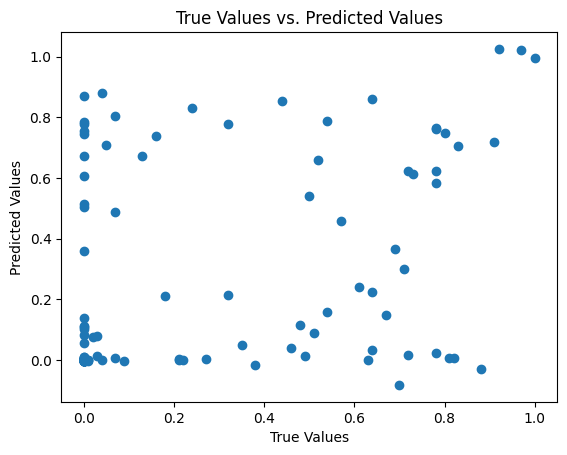

In [192]:
#visualize

import matplotlib.pyplot as plt

plt.scatter(ext_test_true, ext_test_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

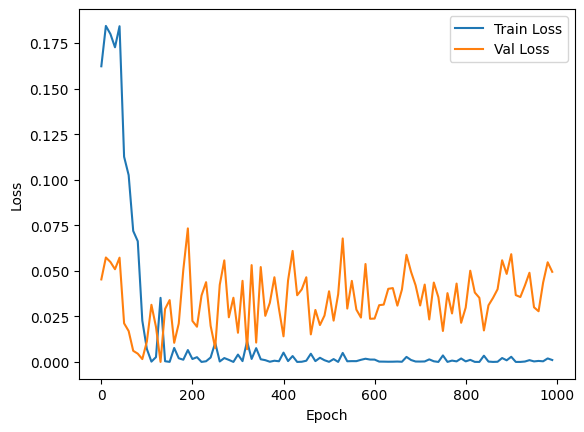

In [193]:
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, val_loss_values, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #mono는 200 정도만 해도 될듯?

In [194]:
from pathlib import Path

torch.save(obj=model_mono.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f='/content/drive/MyDrive/2024_modeling/base_mono.pth')

In [195]:
model_di = basemodel()
model_di.to(device)

optimizer = torch.optim.Adam(model_di.parameters(),lr=1e-4,weight_decay=1e-10)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=100, gamma=0.5)

In [198]:
#train
epoch = 1000
train_loss_values_di = []
val_loss_values_di = []
epoch_count = []

for epoch in range(epoch):
    model_di.train()

    for i, (v_educt, v_ligand_dict, v_solvent_dict, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand_dict.to(device)
        v_solvent = v_solvent_dict.to(device)
        prod = prod.to(device)
        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification
        # print(mono)
        # print(type(mono))
        # print(mono.shape)

        score = model_di(v_educt, v_ligand, v_solvent)
        # print(score)
        # print(type(score))
        # print(score.shape)

        loss = criterion(score, di.unsqueeze(0))
        # print(loss)
        # print(type(loss))
        # print(loss.shape)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    scheduler.step()

    model_di.eval()

    with torch.no_grad():
        for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
            v_educt = v_educt.float().to(device)
            v_ligand = v_ligand.to(device)
            v_solvent = v_solvent.to(device)
            prod = prod.to(device)

            yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

            val_score = model_di(v_educt, v_ligand, v_solvent)
            val_loss = criterion(score, di.unsqueeze(0))
            # print(test_loss)
            # print(type(test_loss))
            # print(test_loss.shape)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values_di.append(loss.to('cpu').detach().numpy())
        val_loss_values_di.append(val_loss.to('cpu').detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {val_loss} ")

Epoch: 0 | MAE Train Loss: 0.002028725342825055 | MAE Test Loss: 0.002028725342825055 
Epoch: 10 | MAE Train Loss: 0.00011597128468565643 | MAE Test Loss: 0.00011597128468565643 
Epoch: 20 | MAE Train Loss: 3.0376702852663584e-05 | MAE Test Loss: 3.0376702852663584e-05 
Epoch: 30 | MAE Train Loss: 4.5278784455149435e-06 | MAE Test Loss: 4.5278784455149435e-06 
Epoch: 40 | MAE Train Loss: 2.1943249066680437e-06 | MAE Test Loss: 2.1943249066680437e-06 
Epoch: 50 | MAE Train Loss: 2.7417083856562385e-06 | MAE Test Loss: 2.7417083856562385e-06 
Epoch: 60 | MAE Train Loss: 2.1858559762222285e-07 | MAE Test Loss: 2.1858559762222285e-07 
Epoch: 70 | MAE Train Loss: 2.4672377548995428e-05 | MAE Test Loss: 2.4672377548995428e-05 
Epoch: 80 | MAE Train Loss: 2.5513165383017622e-05 | MAE Test Loss: 2.5513165383017622e-05 
Epoch: 90 | MAE Train Loss: 2.0667735043389257e-06 | MAE Test Loss: 2.0667735043389257e-06 
Epoch: 100 | MAE Train Loss: 4.0460581551826635e-09 | MAE Test Loss: 4.04605815518266

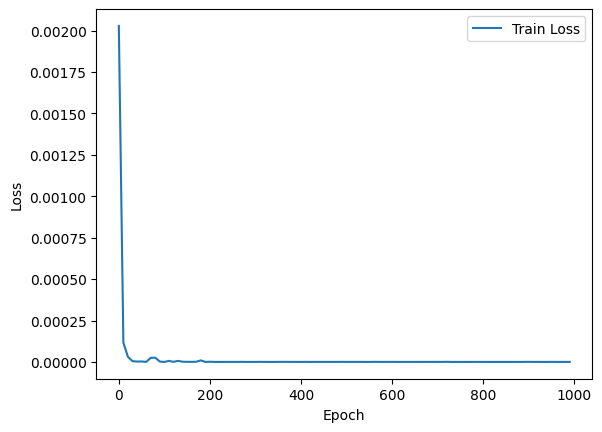

In [200]:
plt.plot(epoch_count, train_loss_values_di, label='Train Loss')
plt.plot(epoch_count, val_loss_values_di, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #di는 100 정도만 해도 될듯?

In [201]:
model_di.eval()
ext_test_true_di = []
ext_test_pred_di = []
ext_test_loss_values_di = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_di(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, di.unsqueeze(0))
        ext_test_true_di.append(di.to('cpu').detach().numpy())
        ext_test_pred_di.append(score.to('cpu').detach().numpy())
        ext_test_loss_values_di.append(test_loss.to('cpu').detach().numpy())

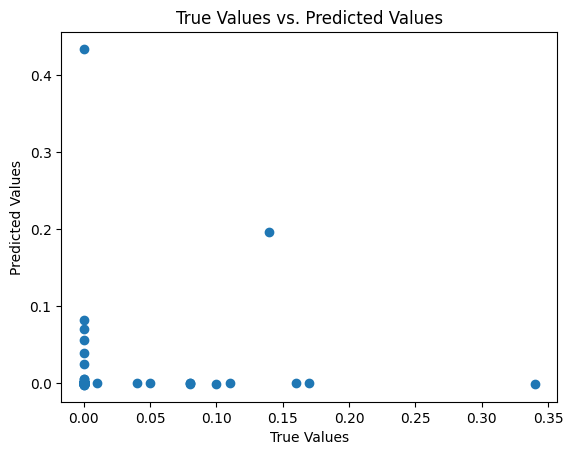

In [202]:
plt.scatter(ext_test_true_di, ext_test_pred_di)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

In [203]:
torch.save(obj=model_di.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f='/content/drive/MyDrive/2024_modeling/base_di.pth')

In [213]:
print(ext_test_true_di)
print(ext_test_pred_di)
print(np.mean(ext_test_loss_values_di))

[array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0.08, dtype=float32), array(0., dtype=float32), array(0.17, dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0., dtype=float32), array(0

In [205]:
model_non = basemodel()
model_non.to(device)

optimizer = torch.optim.Adam(model_non.parameters(),lr=1e-4,weight_decay=1e-10)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size=100, gamma=0.5)

In [206]:
#train
epoch = 1000
train_loss_values_non = []
val_loss_values_non = []
epoch_count = []

for epoch in range(epoch):
    model_non.train()

    for i, (v_educt, v_ligand_dict, v_solvent_dict, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand_dict.to(device)
        v_solvent = v_solvent_dict.to(device)
        prod = prod.to(device)
        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification
        # print(mono)
        # print(type(mono))
        # print(mono.shape)

        score = model_non(v_educt, v_ligand, v_solvent)
        # print(score)
        # print(type(score))
        # print(score.shape)

        loss = criterion(score, non.unsqueeze(0))
        # print(loss)
        # print(type(loss))
        # print(loss.shape)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    scheduler.step()

    model_non.eval()

    with torch.no_grad():
        for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
            v_educt = v_educt.float().to(device)
            v_ligand = v_ligand.to(device)
            v_solvent = v_solvent.to(device)
            prod = prod.to(device)

            yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

            val_score = model_non(v_educt, v_ligand, v_solvent)
            val_loss = criterion(score, non.unsqueeze(0))
            # print(test_loss)
            # print(type(test_loss))
            # print(test_loss.shape)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values_non.append(loss.to('cpu').detach().numpy())
        val_loss_values_non.append(val_loss.to('cpu').detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {val_loss} ")

Epoch: 0 | MAE Train Loss: 0.1439991444349289 | MAE Test Loss: 0.03589971363544464 
Epoch: 10 | MAE Train Loss: 0.1512688845396042 | MAE Test Loss: 0.03957433998584747 
Epoch: 20 | MAE Train Loss: 0.22438600659370422 | MAE Test Loss: 0.08048228174448013 
Epoch: 30 | MAE Train Loss: 0.19102169573307037 | MAE Test Loss: 0.0610387921333313 
Epoch: 40 | MAE Train Loss: 0.14105269312858582 | MAE Test Loss: 0.03443615883588791 
Epoch: 50 | MAE Train Loss: 0.1588725447654724 | MAE Test Loss: 0.04350902885198593 
Epoch: 60 | MAE Train Loss: 0.11027704924345016 | MAE Test Loss: 0.020186694338917732 
Epoch: 70 | MAE Train Loss: 0.06095673516392708 | MAE Test Loss: 0.0032369480468332767 
Epoch: 80 | MAE Train Loss: 0.037200868129730225 | MAE Test Loss: 8.267168595921248e-06 
Epoch: 90 | MAE Train Loss: 0.033296529203653336 | MAE Test Loss: 5.6650253100087866e-05 
Epoch: 100 | MAE Train Loss: 0.01669915020465851 | MAE Test Loss: 0.003693576669320464 
Epoch: 110 | MAE Train Loss: 0.0408427156507968

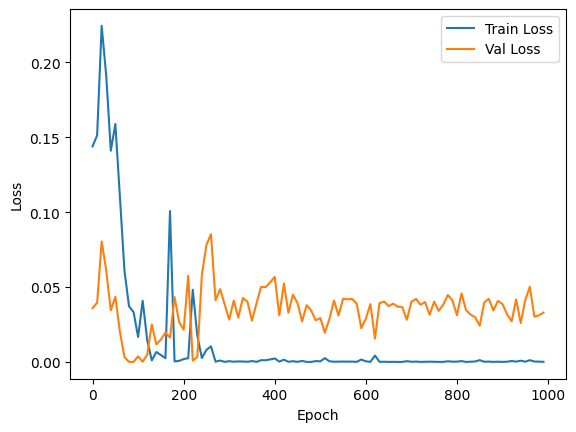

In [207]:
plt.plot(epoch_count, train_loss_values_non, label='Train Loss')
plt.plot(epoch_count, val_loss_values_non, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #non은 250 정도만 해도 될듯?

In [208]:
model_non.eval()
ext_test_true_non = []
ext_test_pred_non = []
ext_test_loss_values_non = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_non(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        ext_test_true_non.append(non.to('cpu').detach().numpy())
        ext_test_pred_non.append(score.to('cpu').detach().numpy())
        ext_test_loss_values_non.append(test_loss.to('cpu').detach().numpy())

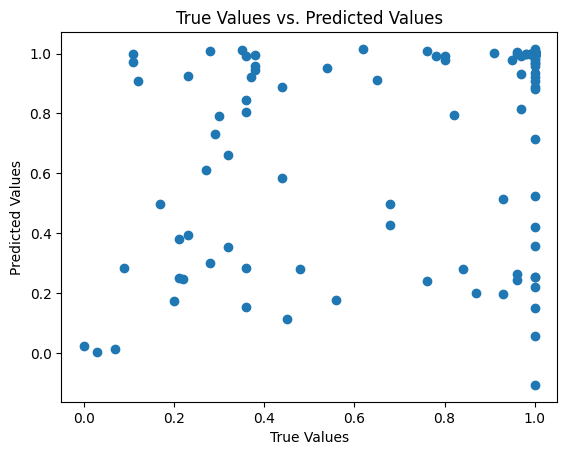

In [209]:
plt.scatter(ext_test_true_non, ext_test_pred_non)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.show()

In [210]:
torch.save(obj=model_non.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f='/content/drive/MyDrive/2024_modeling/base_non.pth')

In [214]:
print(ext_test_true_non)
print(ext_test_pred_non)
print(np.mean(ext_test_loss_values_non))

[array(1., dtype=float32), array(0.68, dtype=float32), array(1., dtype=float32), array(0.8, dtype=float32), array(1., dtype=float32), array(0.45, dtype=float32), array(1., dtype=float32), array(0.97, dtype=float32), array(0.28, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.38, dtype=float32), array(1., dtype=float32), array(0.23, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.44, dtype=float32), array(0.38, dtype=float32), array(0.76, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.2, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.03, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.62, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dty

binary는 threshold 적용한 것 ( >1%, >5%, >10%, and >20%)  
세 경우 모두 저장하고 칼럼으로 만든 후 별도의 dataframe으로 만들기  
그리고 이들을 비교대조 및 th 처리하여 칼럼들 추가  
metric은 이 dataframe 기반으로 만들 것

In [212]:
rxn_ex_df_results = rxn_ex_df[['yes_no',	'mono_bo',	'di_bo',	'non_bo',	'drug']] #실제 결과들

In [228]:
model_mono.eval()
true_mono_train = []
pred_mono_train = []
yes_mono_train = []
drug_mono_train = []
loss_values_mono_train = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_mono(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_mono_train.append(mono.to('cpu').detach().numpy())
        pred_mono_train.append(score.to('cpu').detach().numpy())
        loss_values_mono_train.append(test_loss.to('cpu').detach().numpy())
        yes_mono_train.append(yes.to('cpu').detach().numpy())
        drug_mono_train.append(drug.to('cpu').detach().numpy())

true_mono_val = []
pred_mono_val = []
yes_mono_val = []
drug_mono_val = []
loss_values_mono_val = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_mono(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_mono_val.append(mono.to('cpu').detach().numpy())
        pred_mono_val.append(score.to('cpu').detach().numpy())
        loss_values_mono_val.append(test_loss.to('cpu').detach().numpy())
        yes_mono_val.append(yes.to('cpu').detach().numpy())
        drug_mono_val.append(drug.to('cpu').detach().numpy())

true_mono_test = []
pred_mono_test = []
yes_mono_test = []
drug_mono_test = []
loss_values_mono_test = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_mono(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_mono_test.append(mono.to('cpu').detach().numpy())
        pred_mono_test.append(score.to('cpu').detach().numpy())
        loss_values_mono_test.append(test_loss.to('cpu').detach().numpy())
        yes_mono_test.append(yes.to('cpu').detach().numpy())
        drug_mono_test.append(drug.to('cpu').detach().numpy())

In [229]:
mono_base_df = pd.DataFrame()
mono_base_df['true'] = true_mono_train + true_mono_val + true_mono_test
mono_base_df['pred'] = pred_mono_train + pred_mono_val + pred_mono_test
mono_base_df['loss'] = loss_values_mono_train + loss_values_mono_val + loss_values_mono_test #평균용
mono_base_df['yes'] = yes_mono_train + yes_mono_val + yes_mono_test
mono_base_df['drug'] = drug_mono_train + drug_mono_val + drug_mono_test
mono_base_df.to_csv('/content/drive/MyDrive/2024_modeling/mono_base_result.csv')

In [222]:
mono_base_df

,true,pred,loss
0,0.0,[-0.0002983734],1.0005969
1,0.0,[-0.0011132173],1.0022275
2,0.0,[-0.0004163757],1.0008329
3,0.0,[-0.0010204576],1.0020419
4,0.0,[-0.0008658618],1.0017323
...,...,...,...
951,0.0,[-0.0012641698],1.00253
952,0.0,[-0.0013211966],1.0026442
953,0.51,[0.08885533],0.07904233
954,0.54,[0.15719786],0.041128714


In [230]:
model_di.eval()
true_di_train = []
pred_di_train = []
yes_di_train = []
drug_di_train = []
loss_values_di_train = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_di(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, di.unsqueeze(0))
        true_di_train.append(di.to('cpu').detach().numpy())
        pred_di_train.append(score.to('cpu').detach().numpy())
        loss_values_di_train.append(test_loss.to('cpu').detach().numpy())
        yes_di_train.append(yes.to('cpu').detach().numpy())
        drug_di_train.append(drug.to('cpu').detach().numpy())

true_di_val = []
pred_di_val = []
yes_di_val = []
drug_di_val = []
loss_values_di_val = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_di(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, di.unsqueeze(0))
        true_di_val.append(di.to('cpu').detach().numpy())
        pred_di_val.append(score.to('cpu').detach().numpy())
        loss_values_di_val.append(test_loss.to('cpu').detach().numpy())
        yes_di_val.append(yes.to('cpu').detach().numpy())
        drug_di_val.append(drug.to('cpu').detach().numpy())

true_di_test = []
pred_di_test = []
yes_di_test = []
drug_di_test = []
loss_values_di_test = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_di(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, di.unsqueeze(0))
        true_di_test.append(di.to('cpu').detach().numpy())
        pred_di_test.append(score.to('cpu').detach().numpy())
        loss_values_di_test.append(test_loss.to('cpu').detach().numpy())
        yes_di_test.append(yes.to('cpu').detach().numpy())
        drug_di_test.append(drug.to('cpu').detach().numpy())

di_base_df = pd.DataFrame()
di_base_df['true'] = true_di_train + true_di_val + true_di_test
di_base_df['pred'] = pred_di_train + pred_di_val + pred_di_test
di_base_df['loss'] = loss_values_di_train + loss_values_di_val + loss_values_di_test #평균용
di_base_df['yes'] = yes_di_train + yes_di_val + yes_di_test
di_base_df['drug'] = drug_di_train + drug_di_val + drug_di_test
di_base_df.to_csv('/content/drive/MyDrive/2024_modeling/di_base_result.csv')

In [226]:
di_base_df

,true,pred,loss
0,0.0,[0.00011009048],1.2119913e-08
1,0.0,[0.00017815386],3.1738796e-08
2,0.0,[0.00022182753],4.9207454e-08
3,0.0,[8.751545e-05],7.658954e-09
4,0.0,[-9.645708e-05],9.303968e-09
...,...,...,...
951,0.0,[-6.480934e-05],4.200251e-09
952,0.0,[0.000121768564],1.4827584e-08
953,0.11,[0.00016272208],0.012064228
954,0.1,[-0.00034009852],0.010068135


In [231]:
model_non.eval()
true_non_train = []
pred_non_train = []
yes_non_train = []
drug_non_train = []
loss_values_non_train = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(train_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_non(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_non_train.append(non.to('cpu').detach().numpy())
        pred_non_train.append(score.to('cpu').detach().numpy())
        loss_values_non_train.append(test_loss.to('cpu').detach().numpy())
        yes_non_train.append(yes.to('cpu').detach().numpy())
        drug_non_train.append(drug.to('cpu').detach().numpy())

true_non_val = []
pred_non_val = []
yes_non_val = []
drug_non_val = []
loss_values_non_val = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(val_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_non(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_non_val.append(non.to('cpu').detach().numpy())
        pred_non_val.append(score.to('cpu').detach().numpy())
        loss_values_non_val.append(test_loss.to('cpu').detach().numpy())
        yes_non_val.append(yes.to('cpu').detach().numpy())
        drug_non_val.append(drug.to('cpu').detach().numpy())

true_non_test = []
pred_non_test = []
yes_non_test = []
drug_non_test = []
loss_values_non_test = []
with torch.no_grad():
    for j, (v_educt, v_ligand, v_solvent, prod) in enumerate(test_dataset):
        v_educt = v_educt.float().to(device)
        v_ligand = v_ligand.to(device)
        v_solvent = v_solvent.to(device)
        prod = prod.to(device)

        yes, mono, di, non, drug = prod #mono, di, non이 regression. yes, drug가 binary classification

        score = model_non(v_educt, v_ligand, v_solvent)
        # print(score)
        test_loss = criterion(score, non.unsqueeze(0))
        true_non_test.append(non.to('cpu').detach().numpy())
        pred_non_test.append(score.to('cpu').detach().numpy())
        loss_values_non_test.append(test_loss.to('cpu').detach().numpy())
        yes_non_test.append(yes.to('cpu').detach().numpy())
        drug_non_test.append(drug.to('cpu').detach().numpy())

non_base_df = pd.DataFrame()
non_base_df['true'] = true_non_train + true_non_val + true_non_test
non_base_df['pred'] = pred_non_train + pred_non_val + pred_non_test
non_base_df['loss'] = loss_values_non_train + loss_values_non_val + loss_values_non_test #평균용
non_base_df['yes'] = yes_non_train + yes_non_val + yes_non_test
non_base_df['drug'] = drug_non_train + drug_non_val + drug_non_test
non_base_df.to_csv('/content/drive/MyDrive/2024_modeling/non_base_result.csv')

graph도 이와 같이 한다  
우선 그래프 모델 구축부터

In [ ]:
list_dict_atom = {}
ATOMTYPES = ["H","C","N","O","F","P","S","Cl","Br","I"]
list_counter_atom = Counter(ATOMTYPES)

for idx, x in enumerate(list_counter_atom):
    list_dict_atom[x] = idx

list_dict_qmlatom = {}
QML_ATOMTYPES = ["X","H","C","N","O","F","P","S","Cl","Br","I"]
list_counter_qmlatom = Counter(QML_ATOMTYPES)

for idx, x in enumerate(list_counter_qmlatom):
    list_dict_qmlatom[x] = idx

list_dict_ring = {}
IS_RING = ["True","False"]
list_counter_ring = Counter(IS_RING)

for idx, x in enumerate(list_counter_ring):
    list_dict_ring[x] = idx

list_dict_aroma = {}
AROMATOCITY = ["True","False"]
list_counter_aroma = Counter(AROMATOCITY)

for idx, x in enumerate(list_counter_aroma):
    list_dict_aroma[x] = idx

list_dict_hybrid = {}
HYBRIDISATIONS = ["SP3","SP2","SP","UNSPECIFIED","S"]
list_counter_hybrid = Counter(HYBRIDISATIONS)

for idx, x in enumerate(list_counter_hybrid):
    list_dict_hybrid[x] = idx

In [ ]:
class GNN(nn.Module):
    def __init__(self, n_kernels=3, mlp_dim=512, kernel_dim=64, embeddings_dim=64, qml=True, geometry=True):
        super(GNN, self).__init__()

        self.embeddings_dim = embeddings_dim
        self.m_dim = 16
        self.kernel_dim = kernel_dim
        self.n_kernels = n_kernels
        self.aggr = "add"
        self.pos_dim = 3
        self.mlp_dim = mlp_dim
        self.qml = qml
        self.geometry = geometry

        dropout = 0.1
        self.dropout = nn.Dropout(dropout)

        self.atom_em = nn.Embedding(num_embeddings=10, embedding_dim=self.embeddings_dim)
        self.ring_em = nn.Embedding(num_embeddings=2, embedding_dim=self.embeddings_dim)
        self.hybr_em = nn.Embedding(num_embeddings=4, embedding_dim=self.embeddings_dim)
        self.arom_em = nn.Embedding(num_embeddings=2, embedding_dim=self.embeddings_dim)

    def forward(self, data):
        # print